# Data Massaging || Masajeo de Datos

Libreria Pandas
- La libreria mas comun utilizada para Maniopulacion y analisis de datos
- Flexibilidad y potencia para manejar datos
- Importacion de datos a una estructura Pandas : DataFrame / DF
- Buqueda de datos, seleccion y filtro
- Operaciones basicas con DF

## Introduccion

In [25]:
# Importacion
import pandas as pd

# Otras librerias necesarias y utiles para usar pandas
import numpy as np

In [26]:
# Lectura del documento csv

df = pd.read_csv("../../../Archivos-Analisis/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Ver registros desde un rango
df[0:10]

In [ ]:
# Ver primeros registros
df.head(5)

In [ ]:
# Ver ultimos registros
df.tail(5)

In [ ]:
# Ver registros aleatorios
df.sample(5)

In [20]:
# Se puede generar datos sobre los datos (metadata), de manera automatica con [describe]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [28]:
# Para ver el numero de Filas y Columnas
df.shape

(8807, 12)

In [31]:
# Ver Tipos de datos
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Agrupaciones

In [33]:
df.groupby("type").count() # Ceunta por cada tipo de show

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131
TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676


In [36]:
df.groupby("type").count()["country"] # Cuenta por cada pais

type
Movie      5691
TV Show    2285
Name: country, dtype: int64

In [39]:
# Cuenta los principales numeros de shows en los paices
#df.groupby("country").count()["show_id"].sort_values(ascending=False)

df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10] # Busca el top 10

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

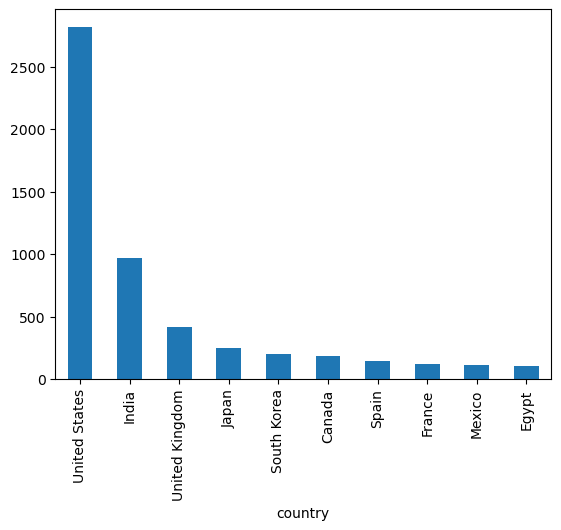

In [41]:
df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10].plot.bar()

In [46]:
# Por director
df.groupby("director").count()["country"].sort_values(ascending=False)[:10]

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: country, dtype: int64

## Conversion a Numpy

In [49]:
# Convierte el DF a una estructura de numpy (.to_numpy())
df.to_numpy()

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., '90 min',
        'Documentaries',
        'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
       ['s2', 'TV Show', 'Blood & Water', ..., '2 Seasons',
        'International TV Shows, TV Dramas, TV Mysteries',
        'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'],
       ['s3', 'TV Show', 'Ganglands', ..., '1 Season',
        'Crime TV Shows, International TV Shows, TV Action & Adventure',
        'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'],
       ...,
       ['s8805', 'Movie', 'Zombieland', ..., '88 min',
        'Comedies, Horror Movies',
        'Looking to survive in a world taken over by zombies, a dorky college st

## Agregacion de columnas / Cambion de tipo de dato

In [50]:
# Se generara la duracion de la pelicula numericamente
# Como primer paso se generara una nueva columna para no modificar la estructura original
df["duration_num"] = df["duration"]

In [63]:
# Generamos un campo adicional de unidades, para guardar la informacion que podra ser min o season
df["duration_unit"] = ""

In [ ]:
# Como primer paso, cambiamos el tipo de la columna de las columnas de duracion
df["duration_unit"] = df["duration_unit"].astype(pd.StringDtype()) # Se cambia a tipo string

In [ ]:
# Si se requiere hacer para mas columnas a la vez (todas del mismo tipo)
# Podria primero buscar todas las columnas de ese tipo
df.select_dtypes(include="object").columns

# Y aplicamos el cambio

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description', 'duration_num'],
      dtype='object')

In [59]:
# Cambiamos el tipo de dato
string_col = df.select_dtypes(include="object").columns # Lo guardamos en un DF
df[string_col] = df[string_col].fillna("").astype(pd.StringDtype())

In [ ]:
# Comprobamos
df.dtypes

show_id          string[python]
type             string[python]
title            string[python]
director         string[python]
cast             string[python]
country          string[python]
date_added       string[python]
release_year              int64
rating           string[python]
duration         string[python]
listed_in        string[python]
description      string[python]
duration_num     string[python]
duration_unit    string[python]
dtype: object

## Graficacion sencilla

<Axes: >

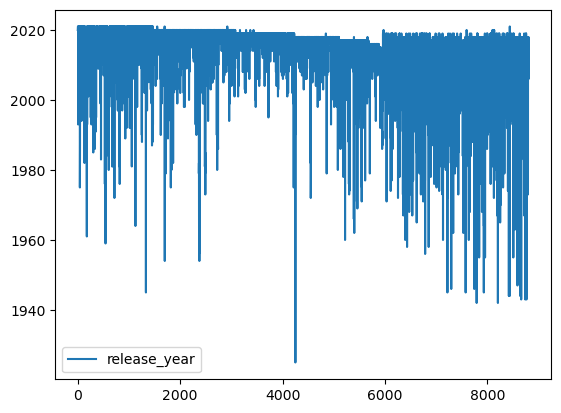

In [21]:
df.plot()

<Axes: ylabel='Frequency'>

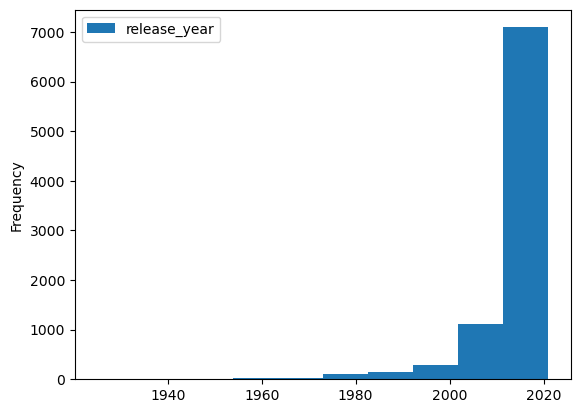

In [23]:
df.plot.hist()

# Busqueda de datos
- Uso de Where, endswith, replace

In [67]:
# Buscaremos los registros que tengan "min" y con ellos, se asignara los calores a la columna "duration_unit"

# el primer paso es definir en todas las unidades "min", esto luego se cambiara
df["duration_unit"] = "min"

In [66]:
# Comprobamos
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90 min,min
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,min


## Where / Endswith

In [68]:
# Usando where asignamos la duration_unit a min cuando es "min" y a "season" cuando es <> min
df["duration_unit"] = df["duration_unit"].where(df.duration_num.str.endswith("min"), "season")

In [70]:
# Comprobamos
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
5607,s5608,Movie,Katherine Ryan: In Trouble,Colin Dench,Katherine Ryan,United Kingdom,"February 14, 2017",2017,TV-MA,64 min,Stand-Up Comedy,Stand-up comic Katherine Ryan reminisces about...,64 min,min
8223,s8224,Movie,The Brave One,Neil Jordan,"Jodie Foster, Terrence Howard, Naveen Andrews,...",United States,"November 1, 2019",2007,R,122 min,"Dramas, Thrillers",New York City radio host Erica Bain decides to...,122 min,min
6092,s6093,Movie,Adrishya,Sandeep Chatterjee,"Ravi Kumar, Ayesha Singh, Nishat Mallick, Arch...",India,"December 31, 2019",2017,TV-14,99 min,"Horror Movies, Independent Movies, Internation...",A family’s harmonious existence is interrupted...,99 min,min


## Replace

In [71]:
# Usamos replace para el reemplazo de los strings
# En este caso se reemplaza todas  las ocurrencias de min, Season y Seasons por blancos
df["duration_num"] = df["duration_num"].replace({" min":"", " Season":"", " Seasons":"", "s":""}, regex=True) # regex:Las expreciones regulares que asigno, se cumplan

In [72]:
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
7216,s7217,Movie,KL Zombi,Woo Ming Jin,"Zizan Razak, Siti Saleha, Zain Hamid, Izara Ai...",Malaysia,"August 21, 2017",2013,TV-14,92 min,"Comedies, Horror Movies, International Movies",A field hockey-playing pizza delivery boy find...,92,min
2112,s2113,TV Show,DeMarcus Family Rules,,,United States,"August 19, 2020",2020,TV-14,1 Season,Reality TV,Rascal Flatts bassist Jay DeMarcus and ex-beau...,1,season
6042,s6043,Movie,A Kind of Murder,Andy Goddard,"Patrick Wilson, Jessica Biel, Vincent Kartheis...",United States,"May 1, 2017",2016,R,96 min,Thrillers,"Obsessed with an unsolved murder case, a crime...",96,min


In [73]:
# Validamos el contenido y el split que se hizo de la columna
df[["show_id", "type", "duration", "duration_num", "duration_unit"]].sample(10)

,show_id,type,duration,duration_num,duration_unit
548,s549,TV Show,17 Seasons,17,season
1155,s1156,Movie,21 min,21,min
6648,s6649,Movie,92 min,92,min
636,s637,Movie,109 min,109,min
3559,s3560,Movie,66 min,66,min
3943,s3944,TV Show,8 Seasons,8,season
5697,s5698,Movie,24 min,24,min
6610,s6611,Movie,176 min,176,min
4834,s4835,Movie,110 min,110,min
3573,s3574,Movie,63 min,63,min


In [74]:
# Cambiamos el tipo de columna de duration_num a numerico
df["duration_num"] = pd.to_numeric(df["duration_num"])

In [75]:
# Comprobamos
df.dtypes

show_id          string[python]
type             string[python]
title            string[python]
director         string[python]
cast             string[python]
country          string[python]
date_added       string[python]
release_year              int64
rating           string[python]
duration         string[python]
listed_in        string[python]
description      string[python]
duration_num            Float64
duration_unit            object
dtype: object

In [76]:
# Buscamos los valores NaN o nulos en duration_num
df.loc[df["duration_num"].isnull()] # loc: localiza los datos

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,,Movies,"Louis C.K. muses on religion, eternal love, gi...",<NA>,season
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,,Movies,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,season
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,,Movies,The comic puts his trademark hilarious/thought...,<NA>,season


In [77]:
# Para las 3 peliculas nulas, se le asignara la duracion de la columna "rating"
# Con la funcion "at", se puede hacer los cambios de una manera 100% manual
# Muy util para cambios pequeños, omitirse para volumenes de datos mas amplios

    # ID   |  DataFrame     | Valor
df.at[5541, "duration_unit"] = "min"
df.at[5794, "duration_unit"] = "min"
df.at[5813, "duration_unit"] = "min"
    # ID   |  DataFrame     | Valor
df.at[5541, "duration_num"] = 74
df.at[5794, "duration_num"] = 84
df.at[5813, "duration_num"] = 66
    # ID   |  DataFrame     | Valor
df.at[5541, "duration"] = "74 min"
df.at[5794, "duration"] = "84 min"
df.at[5813, "duration"] = "66 min"


In [78]:
# Buscamos los nulos nuevamente
df.loc[df["duration_num"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit


In [80]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.0
mean,2014.180198,69.84853
std,8.819312,50.806431
min,1925.000000,1.0
25%,2013.000000,2.0
50%,2017.000000,88.0
75%,2019.000000,106.0
max,2021.000000,312.0


<Axes: ylabel='Frequency'>

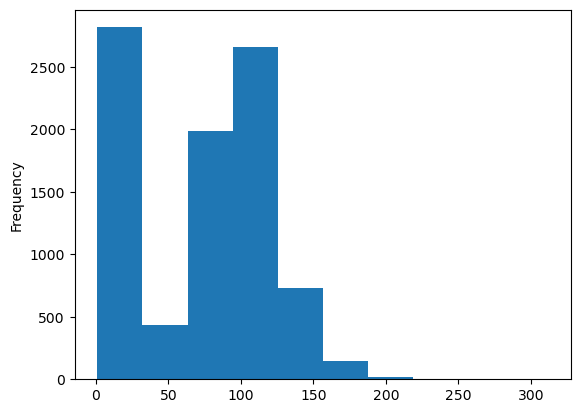

In [81]:
df.duration_num.plot.hist()